header## https://www.kaggle.com/paul92s/bitcoin-lstm-model-with-tweet-volume-and-sentiment/?select=btcSave2.csv#data
## https://towardsdatascience.com/technical-indicators-on-bitcoin-using-python-c392b4a33810
## https://medium.com/@DrPaulSimpson/lstm-model-predicting-bitcoin-with-tweet-volume-sentiment-bc3c490271a7
## https://towardsdatascience.com/using-deep-learning-ai-to-predict-the-stock-market-9399cf15a312
## https://towardsdatascience.com/predicting-bitcoin-prices-with-deep-learning-438bc3cf9a6f


In [74]:
import pandas as pd
import re
from matplotlib import pyplot
import seaborn as sns
import numpy as np
import os  # accessing directory structure

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os


#set seed
np.random.seed(12345)

In [75]:
notclean = pd.read_csv('cleanprep.csv', delimiter=',', on_bad_lines='skip', engine='python',
                       header=None)

In [76]:
notclean.head()

,0,1,2,3,4
0,2018-07-11 19:35:15.363270,b'tj',"b""Next two weeks prob v boring (climb up to 9k) unless there's a new good listing to flip that isn't absolute garbage\xe2\x80\xa6 https://t.co/ji4dWYaBXA""",0.007273,0.590909
1,2018-07-11 19:35:15.736769,b'Kool_Kheart',b'@Miss_rinola But you\xe2\x80\x99ve heard about BITCOIN?',0.000000,0.000000
2,2018-07-11 19:35:15.744769,b'Gary Lang',"b'Duplicate skilled traders automatically with Bitcoin! \xf0\x9f\x92\xb0\xf0\x9f\x92\xb0\n\nI copy ""wangzai888"". Do you?\n\n\xe2\x9e\xa1\xef\xb8\x8f https://t.co/VAkIs5LRvI\xe2\x80\xa6 https://t.co/uEeRuwul6m'",0.625000,0.500000
3,2018-07-11 19:35:15.867339,b'Jobs in Fintech',b'Project Manager - Technical - FinTech - Central London. - Energon People - [ \xe2\x9e\xa1 https://t.co/Jguy5G4MOT ] #IoT\xe2\x80\xa6 https://t.co/xj3GXTHfQp',0.000000,0.175000
4,2018-07-11 19:35:16.021448,b'ERC20',"b'Coinbase App Downloads Drop, Crypto Hype Fading Quick #ERC20 #Bounty #Bitcoin #Etherium #Crypto #ICO #Blockchain https://t.co/DQW1V3gTjh'",0.333333,0.500000


In [77]:
#-----------------Pre-processing -------------------#

notclean.columns = ['dt', 'name', 'text', 'polarity', 'sensitivity']


In [78]:
notclean = notclean.drop(['name', 'text'], axis=1)

In [79]:
notclean.head()

,dt,polarity,sensitivity
0,2018-07-11 19:35:15.363270,0.007273,0.590909
1,2018-07-11 19:35:15.736769,0.000000,0.000000
2,2018-07-11 19:35:15.744769,0.625000,0.500000
3,2018-07-11 19:35:15.867339,0.000000,0.175000
4,2018-07-11 19:35:16.021448,0.333333,0.500000


In [80]:
notclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413001 entries, 0 to 1413000
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   dt           1413001 non-null  object 
 1   polarity     1413001 non-null  float64
 2   sensitivity  1413001 non-null  float64
dtypes: float64(2), object(1)
memory usage: 32.3+ MB


In [81]:
notclean['dt'] = pd.to_datetime(notclean['dt'])

In [82]:
notclean['DateTime'] = notclean['dt'].dt.floor('h')
notclean.head()

,dt,polarity,sensitivity,DateTime
0,2018-07-11 19:35:15.363270,0.007273,0.590909,2018-07-11 19:00:00
1,2018-07-11 19:35:15.736769,0.000000,0.000000,2018-07-11 19:00:00
2,2018-07-11 19:35:15.744769,0.625000,0.500000,2018-07-11 19:00:00
3,2018-07-11 19:35:15.867339,0.000000,0.175000,2018-07-11 19:00:00
4,2018-07-11 19:35:16.021448,0.333333,0.500000,2018-07-11 19:00:00


In [83]:
vdf = notclean.groupby(pd.Grouper(key='dt', freq='H')).size().reset_index(name='tweet_vol')

/tmp/ipykernel_101790/2112645849.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  vdf = notclean.groupby(pd.Grouper(key='dt', freq='H')).size().reset_index(name='tweet_vol')


In [84]:
vdf.head()

,dt,tweet_vol
0,2018-07-11 19:00:00,1747
1,2018-07-11 20:00:00,4354
2,2018-07-11 21:00:00,4432
3,2018-07-11 22:00:00,3980
4,2018-07-11 23:00:00,3830


In [85]:
vdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   dt         302 non-null    datetime64[ns]
 1   tweet_vol  302 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.8 KB


In [86]:
vdf.index = pd.to_datetime(vdf.index)
vdf = vdf.set_index('dt')

In [87]:
vdf.head()

,tweet_vol
dt,
2018-07-11 19:00:00,1747
2018-07-11 20:00:00,4354
2018-07-11 21:00:00,4432
2018-07-11 22:00:00,3980
2018-07-11 23:00:00,3830


In [88]:
notclean.index = pd.to_datetime(notclean.index)

In [89]:
vdf['tweet_vol'] = vdf['tweet_vol'].astype(float)


In [90]:
df = notclean.groupby('DateTime').agg(lambda x: x.mean())


In [91]:
df['Tweet_vol'] = vdf['tweet_vol']

In [92]:
df = df.drop(df.index[0])
df.head()

,dt,polarity,sensitivity,Tweet_vol
DateTime,,,,
2018-07-11 20:00:00,2018-07-11 20:27:49.510636288,0.102657,0.216148,4354.0
2018-07-11 21:00:00,2018-07-11 21:28:35.636368640,0.098004,0.218612,4432.0
2018-07-11 22:00:00,2018-07-11 22:27:44.646705152,0.096688,0.231342,3980.0
2018-07-11 23:00:00,2018-07-11 23:28:06.455850496,0.103997,0.217739,3830.0
2018-07-12 00:00:00,2018-07-12 00:28:47.975385344,0.094383,0.195256,3998.0


In [93]:
df = df.drop(['dt'], axis=1)

In [94]:
df.tail()

,polarity,sensitivity,Tweet_vol
DateTime,,,
2018-07-24 04:00:00,0.121358,0.236000,4475.0
2018-07-24 05:00:00,0.095163,0.216924,4808.0
2018-07-24 06:00:00,0.088992,0.220173,6036.0
2018-07-24 07:00:00,0.091439,0.198279,6047.0
2018-07-24 08:00:00,0.071268,0.218217,2444.0


In [95]:
btcDF = pd.read_csv('btc.csv', on_bad_lines='skip', engine='python')

In [96]:
btcDF['Timestamp'] = pd.to_datetime(btcDF['Timestamp'])
btcDF = btcDF.set_index(pd.DatetimeIndex(btcDF['Timestamp']))

In [97]:
btcDF.head()

,Timestamp,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
Timestamp,,,,,,,,
2017-08-17 04:00:00,2017-08-17 04:00:00,4261.48,4313.62,4261.32,4308.83,47.181009,202366.138393,4289.143931
2017-08-17 05:00:00,2017-08-17 05:00:00,4308.83,4328.69,4291.37,4315.32,23.234916,100304.823567,4316.986709
2017-08-17 06:00:00,2017-08-17 06:00:00,4330.29,4345.45,4309.37,4324.35,7.229691,31282.312670,4326.922502
2017-08-17 07:00:00,2017-08-17 07:00:00,4316.62,4349.99,4287.41,4349.99,4.443249,19241.058300,4330.402888
2017-08-17 08:00:00,2017-08-17 08:00:00,4333.32,4377.85,4333.32,4360.69,0.972807,4239.503586,4358.010978


In [98]:
btcDF = btcDF.drop(['Timestamp'], axis=1)

In [99]:
Final_df = pd.merge(df, btcDF, how='inner', left_index=True, right_index=True)

In [100]:
Final_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 301 entries, 2018-07-11 20:00:00 to 2018-07-24 08:00:00
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   polarity           301 non-null    float64
 1   sensitivity        301 non-null    float64
 2   Tweet_vol          301 non-null    float64
 3   Open               301 non-null    float64
 4   High               301 non-null    float64
 5   Low                301 non-null    float64
 6   Close              301 non-null    float64
 7   Volume (BTC)       301 non-null    float64
 8   Volume (Currency)  301 non-null    float64
 9   Weighted Price     301 non-null    float64
dtypes: float64(10)
memory usage: 25.9 KB


In [101]:
#Technical Analysis indicators--simple moving average and relative strength index 
def SMA(df, periods=5):
    """
    Calculating the Simple Moving Average for the past n days
    
    **Values must be descending**
    """
    lst = []

    for i in range(len(df)):
        if i < periods:

            # Appending NaNs for instances unable to look back on
            lst.append(np.nan)

        else:
            # Calculating the SMA
            lst.append(round(np.mean(df[i:periods + i]), 2))

    return lst


def RSI(df, periods=5):
    """
    Calculates the Relative Strength Index
    
    **Values must be descending**
    """

    df = df.diff()

    lst = []

    for i in range(len(df)):
        if i < periods or i == len(df) - 1:

            # Appending NaNs for instances unable to look back on
            lst.append(np.nan)

        else:

            # Calculating the Relative Strength Index          
            avg_gain = (sum([x for x in df[i:periods + i] if x >= 0]) / periods)
            avg_loss = (sum([abs(x) for x in df[i:periods + i] if x <= 0]) / periods)
            if avg_loss == 0:
                lst.append(np.nan)
            else:
                rs = avg_gain / avg_loss

                rsi = 100 - (100 / (1 + rs))

                lst.append(round(rsi, 2))
    return lst

In [102]:
Final_df['RSI'] = RSI(Final_df['Close'])
Final_df['SMA'] = SMA(Final_df['Close'])
Final_df = Final_df[5:]

In [103]:
Final_df[Final_df['RSI'] == np.nan]['RSI'] = Final_df['RSI'].mean()

In [104]:
# Set the last value of the 'RSI' column to the mean of the 'RSI' column
Final_df.loc[Final_df.index[-1], 'RSI'] = Final_df['RSI'].mean()

In [105]:
Final_df.tail()

,polarity,sensitivity,Tweet_vol,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price,RSI,SMA
2018-07-24 04:00:00,0.121358,0.236000,4475.0,7771.18,7888.00,7766.59,7865.34,3685.686028,2.885451e+07,7828.801813,86.690,7972.57
2018-07-24 05:00:00,0.095163,0.216924,4808.0,7865.34,8043.23,7865.00,7985.99,5440.501170,4.332446e+07,7963.322422,80.760,7999.38
2018-07-24 06:00:00,0.088992,0.220173,6036.0,7982.76,8007.00,7940.20,7989.00,2381.238763,1.899514e+07,7977.000679,53.280,8003.84
2018-07-24 07:00:00,0.091439,0.198279,6047.0,7988.98,8047.37,7987.24,8031.00,2223.915361,1.783858e+07,8021.247853,51.550,8011.26
2018-07-24 08:00:00,0.071268,0.218217,2444.0,8031.01,8042.00,7966.10,7991.53,1865.078502,1.490788e+07,7993.164042,56.778,7991.53


In [106]:
RSI_mean = Final_df['RSI'].mean()

# Loop through the DataFrame and update NaN values
for i in range(len(Final_df)):
    if np.isnan(Final_df['RSI'].iloc[i]):
        Final_df.loc[Final_df.index[i], 'RSI'] = RSI_mean


In [107]:
Final_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 296 entries, 2018-07-12 01:00:00 to 2018-07-24 08:00:00
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   polarity           296 non-null    float64
 1   sensitivity        296 non-null    float64
 2   Tweet_vol          296 non-null    float64
 3   Open               296 non-null    float64
 4   High               296 non-null    float64
 5   Low                296 non-null    float64
 6   Close              296 non-null    float64
 7   Volume (BTC)       296 non-null    float64
 8   Volume (Currency)  296 non-null    float64
 9   Weighted Price     296 non-null    float64
 10  RSI                296 non-null    float64
 11  SMA                296 non-null    float64
dtypes: float64(12)
memory usage: 38.2 KB


In [108]:
Final_df = Final_df.drop(['Weighted Price'], axis=1)

In [109]:
Final_df.columns = ['Polarity', 'Sensitivity', 'Tweet_vol', 'Open', 'High', 'Low', 'Close_Price', 'Volume_BTC',
                    'Volume_Dollar', 'RSI', 'SMA']

In [110]:
Final_df = Final_df[
    ['Polarity', 'Sensitivity', 'Tweet_vol', 'Open', 'High', 'Low', 'Volume_BTC', 'Volume_Dollar', 'RSI', 'SMA',
     'Close_Price']]

In [111]:
Final_df.head()

,Polarity,Sensitivity,Tweet_vol,Open,High,Low,Volume_BTC,Volume_Dollar,RSI,SMA,Close_Price
2018-07-12 01:00:00,0.100836,0.223076,3713.0,6360.86,6363.93,6325.00,690.819248,4.385119e+06,31.00,6329.13,6326.97
2018-07-12 02:00:00,0.111964,0.195043,3843.0,6325.10,6345.79,6300.18,1154.568000,7.294870e+06,15.76,6305.77,6320.36
2018-07-12 03:00:00,0.105888,0.209939,3831.0,6320.41,6344.42,6319.73,973.139468,6.161464e+06,13.70,6277.30,6343.80
2018-07-12 04:00:00,0.108117,0.208003,3743.0,6343.80,6344.44,6316.52,1089.876181,6.901423e+06,10.54,6247.44,6325.54
2018-07-12 05:00:00,0.106667,0.217231,3480.0,6324.67,6330.00,6300.18,777.377422,4.910882e+06,11.41,6220.47,6328.97


In [112]:
#Exploratory Analysis

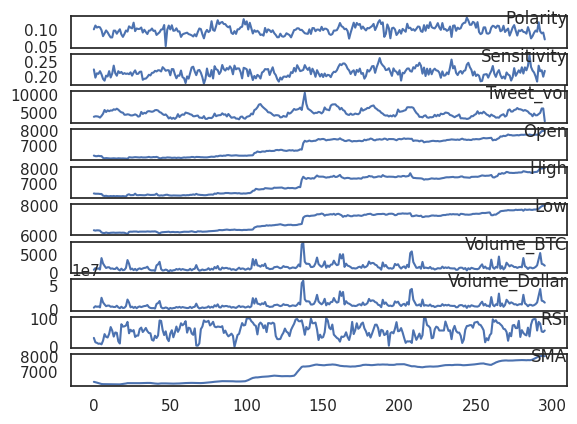

In [113]:
#--------------Analysis----------------------------#

values = Final_df.values
groups = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
i = 1
pyplot.figure()
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group])
    pyplot.title(Final_df.columns[group], y=.5, loc='right')
    i += 1
pyplot.show()

In [114]:
Final_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 296 entries, 2018-07-12 01:00:00 to 2018-07-24 08:00:00
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Polarity       296 non-null    float64
 1   Sensitivity    296 non-null    float64
 2   Tweet_vol      296 non-null    float64
 3   Open           296 non-null    float64
 4   High           296 non-null    float64
 5   Low            296 non-null    float64
 6   Volume_BTC     296 non-null    float64
 7   Volume_Dollar  296 non-null    float64
 8   RSI            296 non-null    float64
 9   SMA            296 non-null    float64
 10  Close_Price    296 non-null    float64
dtypes: float64(11)
memory usage: 35.9 KB


In [115]:
cor = Final_df.corr()
cor

,Polarity,Sensitivity,Tweet_vol,Open,High,Low,Volume_BTC,Volume_Dollar,RSI,SMA,Close_Price
Polarity,1.000000,0.380571,-0.153384,0.151148,0.151154,0.155107,-0.015213,0.002953,0.083747,0.156765,0.151612
Sensitivity,0.380571,1.000000,0.053591,0.180285,0.181909,0.174057,0.090625,0.109642,-0.121123,0.171065,0.175201
Tweet_vol,-0.153384,0.053591,1.000000,0.229125,0.241914,0.222843,0.446812,0.450664,-0.009781,0.234224,0.231220
Open,0.151148,0.180285,0.229125,1.000000,0.997124,0.998730,0.326328,0.410896,0.022845,0.993304,0.997169
High,0.151154,0.181909,0.241914,0.997124,1.000000,0.996695,0.375054,0.457748,0.038027,0.995148,0.998783
Low,0.155107,0.174057,0.222843,0.998730,0.996695,1.000000,0.308049,0.393739,0.039899,0.994283,0.998175
Volume_BTC,-0.015213,0.090625,0.446812,0.326328,0.375054,0.308049,1.000000,0.993779,-0.016318,0.345879,0.346605
Volume_Dollar,0.002953,0.109642,0.450664,0.410896,0.457748,0.393739,0.993779,1.000000,-0.017104,0.428535,0.430234
RSI,0.083747,-0.121123,-0.009781,0.022845,0.038027,0.039899,-0.016318,-0.017104,1.000000,0.098011,0.051023
SMA,0.156765,0.171065,0.234224,0.993304,0.995148,0.994283,0.345879,0.428535,0.098011,1.000000,0.996440


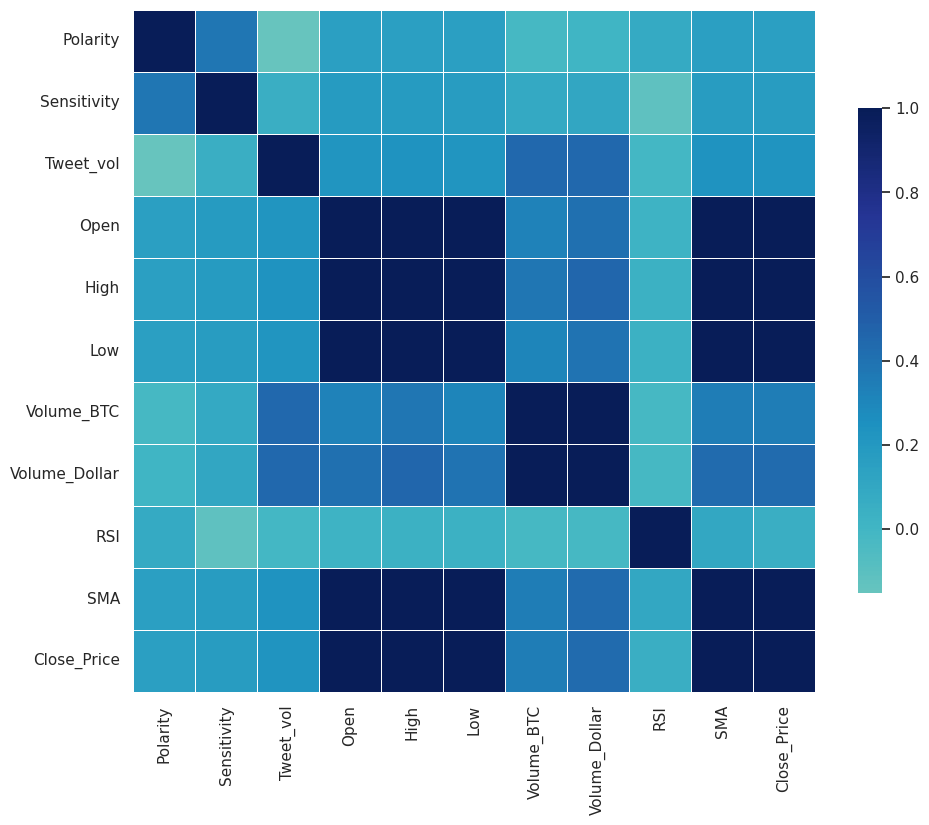

In [116]:
import matplotlib.pyplot as plt

sns.set(style="white")
f, ax = plt.subplots(figsize=(11, 9))

#cmap = sns.diverging_palette(220, 11, as_cmap=True)
ax = sns.heatmap(cor, cmap="YlGnBu", vmax=1, center=0,
                 square=True, linewidths=.5, cbar_kws={"shrink": .7})
plt.show()

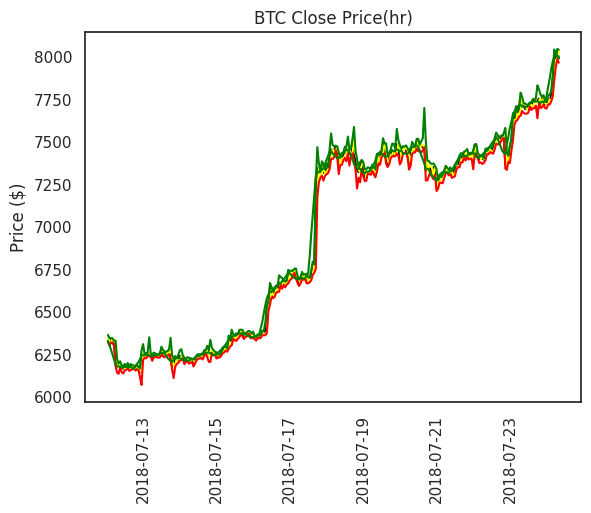

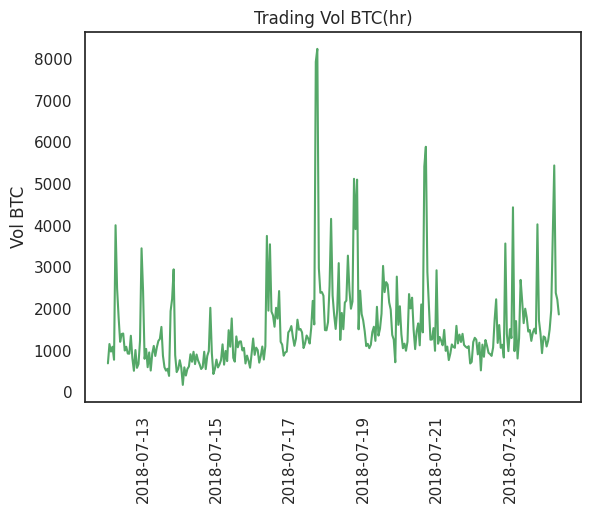

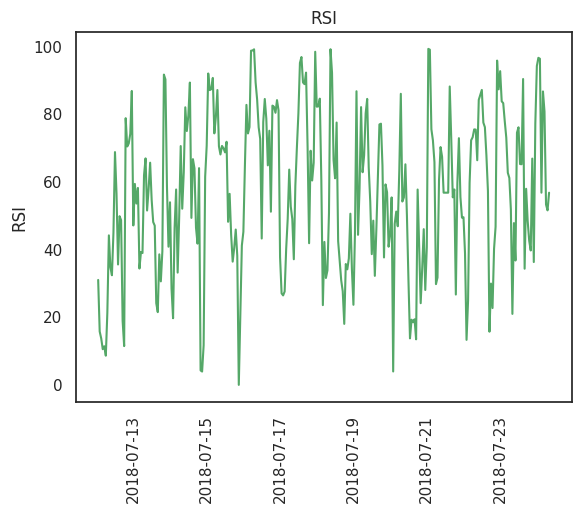

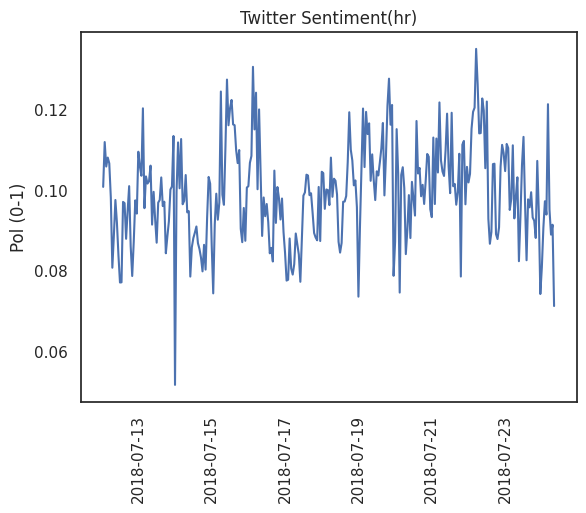

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


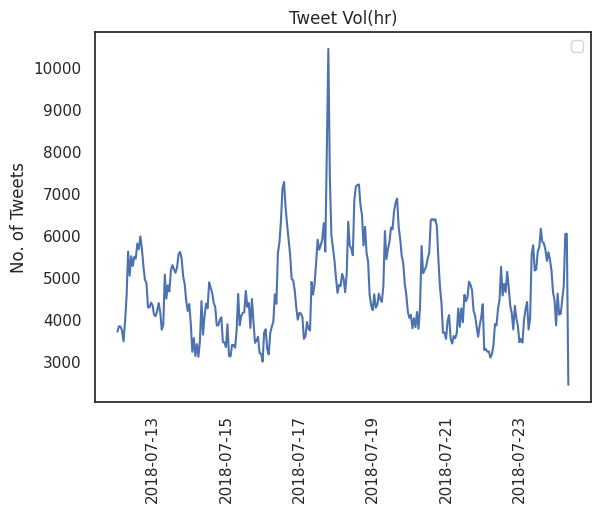

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


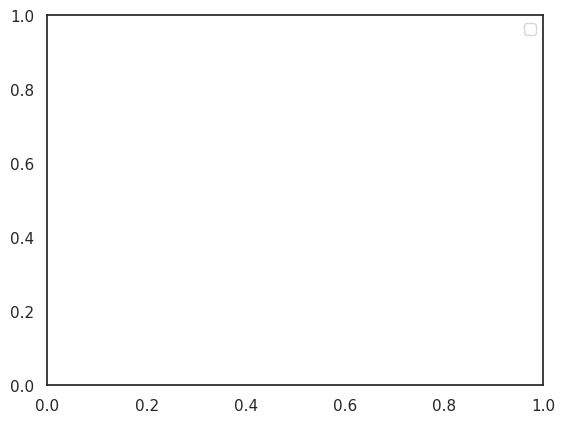

In [117]:
plt.plot(Final_df.index, Final_df['Close_Price'], 'black')
plt.plot(Final_df.index, Final_df['Open'], 'yellow')
plt.plot(Final_df.index, Final_df['Low'], 'red')
plt.plot(Final_df.index, Final_df['High'], 'green')
plt.plot(Final_df.index, Final_df['SMA'], 'green')
plt.title('BTC Close Price(hr)')
plt.xticks(rotation='vertical')
plt.ylabel('Price ($)');
plt.show();

plt.plot(Final_df.index, Final_df['Volume_BTC'], 'g')
plt.title('Trading Vol BTC(hr)')
plt.xticks(rotation='vertical')
plt.ylabel('Vol BTC');
plt.show();

plt.plot(Final_df.index, Final_df['RSI'], 'g')
plt.title('RSI')
plt.xticks(rotation='vertical')
plt.ylabel('RSI');
plt.show();

plt.plot(Final_df.index, Final_df['Polarity'], 'b')
plt.xticks(rotation='vertical')
plt.title('Twitter Sentiment(hr)')
plt.ylabel('Pol (0-1)');
plt.show();
plt.legend()

plt.plot(Final_df.index, Final_df['Tweet_vol'], 'b')
plt.xticks(rotation='vertical')
plt.title('Tweet Vol(hr)')
plt.ylabel('No. of Tweets');
plt.show();
plt.legend()

In [118]:
Final_df['time'] = Final_df.index.to_series().apply(lambda x: x.strftime("%X"))

In [119]:
hour_df = Final_df

In [120]:
hour_df = hour_df.groupby('time').agg(lambda x: x.mean())

In [121]:
hour_df

,Polarity,Sensitivity,Tweet_vol,Open,High,Low,Volume_BTC,Volume_Dollar,RSI,SMA,Close_Price
time,,,,,,,,,,,
00:00:00,0.089958,0.213147,3974.583333,6984.640000,7016.884167,6940.508333,1562.049465,1.096966e+07,56.835000,7001.803333,6980.694167
01:00:00,0.099596,0.211714,4016.615385,6932.546154,6956.702308,6909.903846,1129.042817,7.982324e+06,61.816923,6959.690769,6938.628462
02:00:00,0.102304,0.204048,3846.769231,6938.351538,6976.980769,6921.679231,1434.234346,1.029132e+07,57.876923,6965.389231,6954.186154
03:00:00,0.104692,0.212259,3818.153846,6953.306154,6981.673077,6939.985385,1279.124602,9.162079e+06,53.443692,6970.146154,6961.600000
04:00:00,0.104500,0.210630,3873.076923,6961.381538,6995.912308,6940.580000,1357.279891,9.760956e+06,56.463077,6973.258462,6965.320769
05:00:00,0.107042,0.215201,3973.692308,6965.148462,6995.740769,6947.345385,1352.753590,9.872102e+06,58.353077,6978.484615,6978.716923
06:00:00,0.103226,0.211174,3935.307692,6978.723846,6996.756154,6943.434615,1557.083959,1.089753e+07,54.897692,6981.802308,6967.120769
07:00:00,0.100211,0.208577,4209.153846,6966.706923,6995.715385,6945.051538,1535.393244,1.090381e+07,60.840000,6990.465385,6977.963846
08:00:00,0.097217,0.210736,4891.615385,6977.263846,7006.598462,6944.896923,1544.818181,1.096765e+07,59.290615,6995.695385,6977.168462


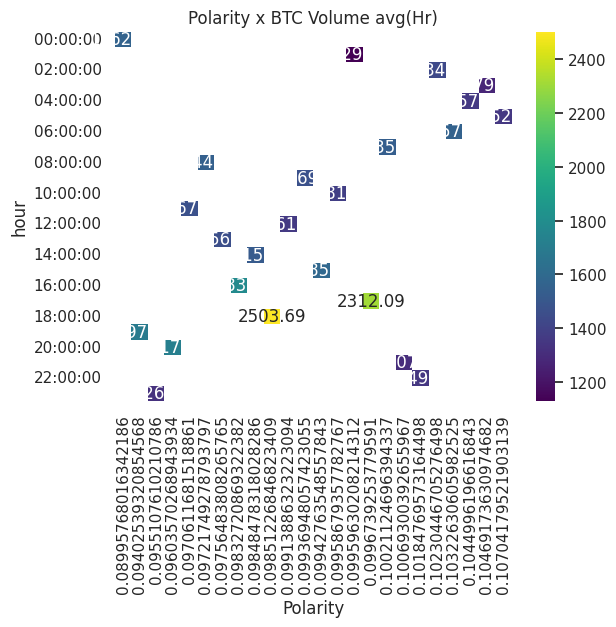

In [122]:
#sns Hourly Heatmap
hour_df['hour'] = hour_df.index
result = hour_df.pivot(index='hour', columns='Polarity', values='Volume_BTC')
sns.heatmap(result, annot=True, fmt="g", cmap='viridis')
plt.title('Polarity x BTC Volume avg(Hr)')
plt.show()



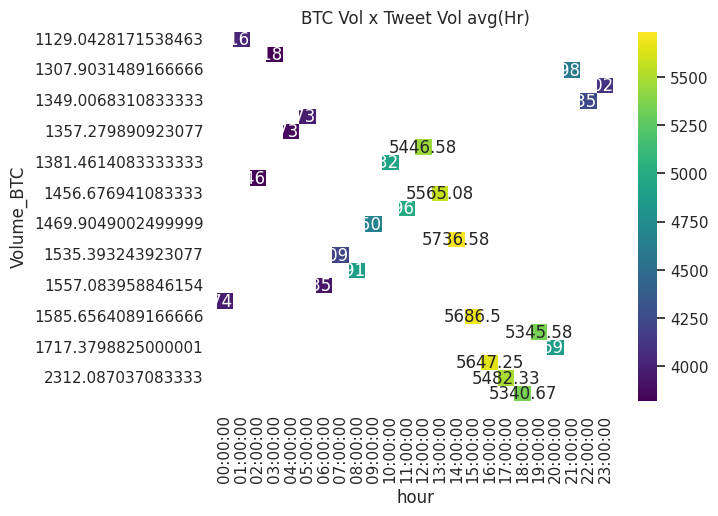

In [123]:
hour_df['hour'] = hour_df.index
result = hour_df.pivot(index='Volume_BTC', columns='hour', values='Tweet_vol')
sns.heatmap(result, annot=True, fmt="g", cmap='viridis')
plt.title('BTC Vol x Tweet Vol avg(Hr)')
plt.show()

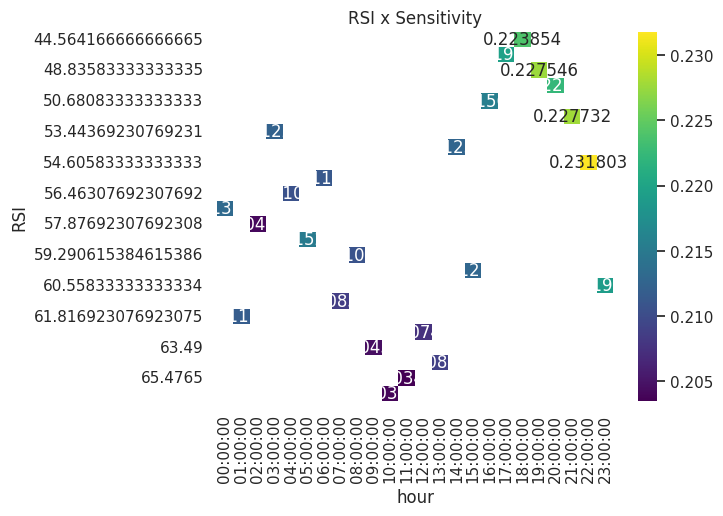

In [124]:
hour_df['hour'] = hour_df.index
result = hour_df.pivot(index='RSI', columns='hour', values='Sensitivity')
sns.heatmap(result, annot=True, fmt="g", cmap='viridis')
plt.title('RSI x Sensitivity')
plt.show()

In [125]:
#----------------End Analysis------------------------#

In [126]:
#---------------- LSTM Prep ------------------------#

In [127]:
df = Final_df

In [128]:
df = df.drop(['Open', 'High', 'Low', 'Volume_Dollar'], axis=1)
df.head()

,Polarity,Sensitivity,Tweet_vol,Volume_BTC,RSI,SMA,Close_Price,time
2018-07-12 01:00:00,0.100836,0.223076,3713.0,690.819248,31.00,6329.13,6326.97,01:00:00
2018-07-12 02:00:00,0.111964,0.195043,3843.0,1154.568000,15.76,6305.77,6320.36,02:00:00
2018-07-12 03:00:00,0.105888,0.209939,3831.0,973.139468,13.70,6277.30,6343.80,03:00:00
2018-07-12 04:00:00,0.108117,0.208003,3743.0,1089.876181,10.54,6247.44,6325.54,04:00:00
2018-07-12 05:00:00,0.106667,0.217231,3480.0,777.377422,11.41,6220.47,6328.97,05:00:00


In [129]:
df = df[['Close_Price', 'Polarity', 'Sensitivity', 'Tweet_vol', 'Volume_BTC', 'RSI', 'SMA']]
df.head()

,Close_Price,Polarity,Sensitivity,Tweet_vol,Volume_BTC,RSI,SMA
2018-07-12 01:00:00,6326.97,0.100836,0.223076,3713.0,690.819248,31.00,6329.13
2018-07-12 02:00:00,6320.36,0.111964,0.195043,3843.0,1154.568000,15.76,6305.77
2018-07-12 03:00:00,6343.80,0.105888,0.209939,3831.0,973.139468,13.70,6277.30
2018-07-12 04:00:00,6325.54,0.108117,0.208003,3743.0,1089.876181,10.54,6247.44
2018-07-12 05:00:00,6328.97,0.106667,0.217231,3480.0,777.377422,11.41,6220.47


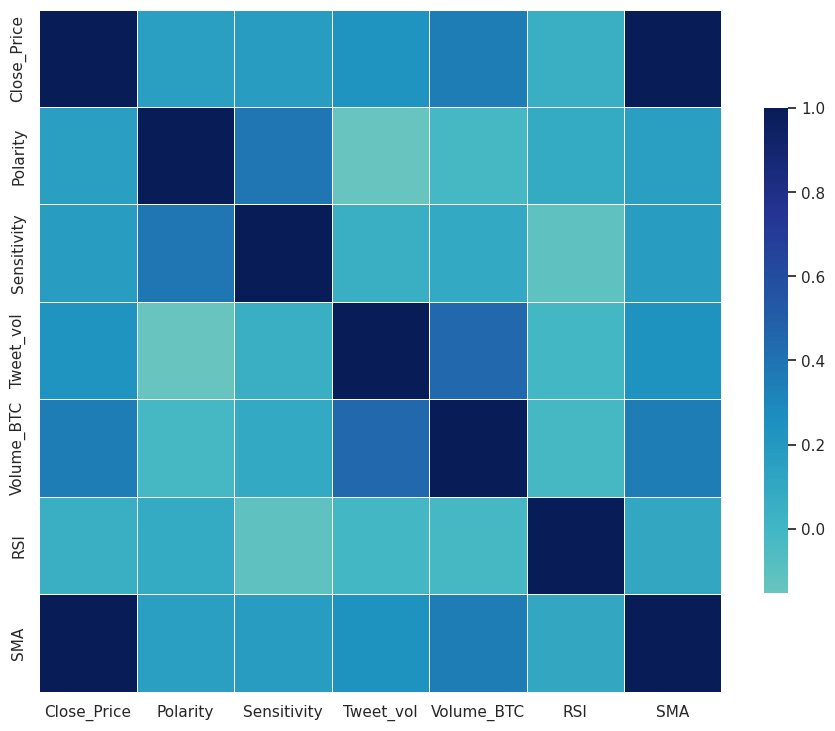

In [130]:
cor = df.corr()
import matplotlib.pyplot as plt

sns.set(style="white")
f, ax = plt.subplots(figsize=(11, 9))

#cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(cor, cmap="YlGnBu", vmax=1, center=0,
                 square=True, linewidths=.5, cbar_kws={"shrink": .7})
plt.show()

In [131]:
##LSTM MODEL
from math import sqrt
from numpy import concatenate
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot

from pandas import read_csv
from pandas import DataFrame
from pandas import concat


# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j + 1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j + 1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j + 1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [132]:
values = df.values
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]
df = df[['Close_Price', 'Polarity', 'Sensitivity', 'Tweet_vol', 'Volume_BTC', 'SMA', 'RSI']]
df.head()

,Close_Price,Polarity,Sensitivity,Tweet_vol,Volume_BTC,SMA,RSI
2018-07-12 01:00:00,6326.97,0.100836,0.223076,3713.0,690.819248,6329.13,31.00
2018-07-12 02:00:00,6320.36,0.111964,0.195043,3843.0,1154.568000,6305.77,15.76
2018-07-12 03:00:00,6343.80,0.105888,0.209939,3831.0,973.139468,6277.30,13.70
2018-07-12 04:00:00,6325.54,0.108117,0.208003,3743.0,1089.876181,6247.44,10.54
2018-07-12 05:00:00,6328.97,0.106667,0.217231,3480.0,777.377422,6220.47,11.41


In [133]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(df.values)

In [134]:
n_hours = 3  #adding 3 hours lags creating number of observations 
n_features = 7  #Features in the dataset.
n_obs = n_hours * n_features

In [135]:
reframed = series_to_supervised(scaled, n_hours, 1)
reframed.head()

,var1(t-3),var2(t-3),var3(t-3),var4(t-3),var5(t-3),var6(t-3),var7(t-3),var1(t-2),var2(t-2),var3(t-2),...,var5(t-1),var6(t-1),var7(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t)
3,0.096997,0.589271,0.500135,0.158467,0.064065,0.089495,0.312311,0.093494,0.722717,0.212514,...,0.099073,0.061441,0.138021,0.096239,0.676582,0.345485,0.162213,0.113548,0.045278,0.106186
4,0.093494,0.722717,0.212514,0.174700,0.121570,0.076851,0.158775,0.105916,0.649855,0.365349,...,0.113548,0.045278,0.106186,0.098057,0.659195,0.440157,0.129371,0.074798,0.030680,0.114951
5,0.105916,0.649855,0.365349,0.173202,0.099073,0.061441,0.138021,0.096239,0.676582,0.345485,...,0.074798,0.030680,0.114951,0.035107,0.557567,0.327165,0.188561,0.475099,0.013548,0.086943
6,0.096239,0.676582,0.345485,0.162213,0.113548,0.045278,0.106186,0.098057,0.659195,0.440157,...,0.475099,0.013548,0.086943,0.018049,0.348710,0.169128,0.264361,0.287134,0.008742,0.214789
7,0.098057,0.659195,0.440157,0.129371,0.074798,0.030680,0.114951,0.035107,0.557567,0.327165,...,0.287134,0.008742,0.214789,0.026798,0.444672,0.106583,0.396728,0.200662,0.008092,0.444993


In [136]:
reframed.values

array([[0.09699693, 0.58927118, 0.50013485, ..., 0.11354845, 0.04527814,
        0.10618577],
       [0.09349415, 0.72271735, 0.21251356, ..., 0.07479849, 0.03067979,
        0.11495063],
       [0.10591552, 0.64985546, 0.36534897, ..., 0.47509889, 0.01354826,
        0.08694338],
       ...,
       [0.86381003, 0.50686965, 0.07334765, ..., 0.27367788, 0.9959837 ,
        0.53677211],
       [0.91221311, 0.83535937, 0.63273343, ..., 0.25416972, 1.        ,
        0.51934314],
       [0.97614821, 0.52124268, 0.43700705, ..., 0.20967382, 0.98932053,
        0.5720129 ]])

In [137]:
values = reframed.values
n_train_hours = 200
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
train.shape

(200, 28)

In [138]:
# split into input and outputs
train_X, train_y = train[:, :n_obs], train[:, -n_features]
test_X, test_y = test[:, :n_obs], test[:, -n_features]

In [139]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(200, 3, 7) (200,) (93, 3, 7) (93,)


In [140]:
from keras import Sequential
from keras.src.layers import LSTM, Dense

# design network
model = Sequential()
model.add(LSTM(5, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=6, validation_data=(test_X, test_y), verbose=2,
                    shuffle=False, validation_split=0.2)
# plot history

Epoch 1/50


/home/nikonych/PycharmProjects/crypto_prediction/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 - 2s - 45ms/step - loss: 0.2851 - val_loss: 0.5969
Epoch 2/50
34/34 - 0s - 3ms/step - loss: 0.2501 - val_loss: 0.4853
Epoch 3/50
34/34 - 0s - 3ms/step - loss: 0.2222 - val_loss: 0.3946
Epoch 4/50
34/34 - 0s - 2ms/step - loss: 0.1939 - val_loss: 0.3081
Epoch 5/50
34/34 - 0s - 3ms/step - loss: 0.1678 - val_loss: 0.2282
Epoch 6/50
34/34 - 0s - 3ms/step - loss: 0.1453 - val_loss: 0.1649
Epoch 7/50
34/34 - 0s - 3ms/step - loss: 0.1199 - val_loss: 0.1097
Epoch 8/50
34/34 - 0s - 2ms/step - loss: 0.0947 - val_loss: 0.0696
Epoch 9/50
34/34 - 0s - 2ms/step - loss: 0.0677 - val_loss: 0.0505
Epoch 10/50
34/34 - 0s - 3ms/step - loss: 0.0474 - val_loss: 0.0500
Epoch 11/50
34/34 - 0s - 2ms/step - loss: 0.0375 - val_loss: 0.0433
Epoch 12/50
34/34 - 0s - 3ms/step - loss: 0.0358 - val_loss: 0.0420
Epoch 13/50
34/34 - 0s - 3ms/step - loss: 0.0348 - val_loss: 0.0403
Epoch 14/50
34/34 - 0s - 3ms/step - loss: 0.0321 - val_loss: 0.0367
Epoch 15/50
34/34 - 0s - 3ms/step - loss: 0.0299 - val_loss: 0.0421

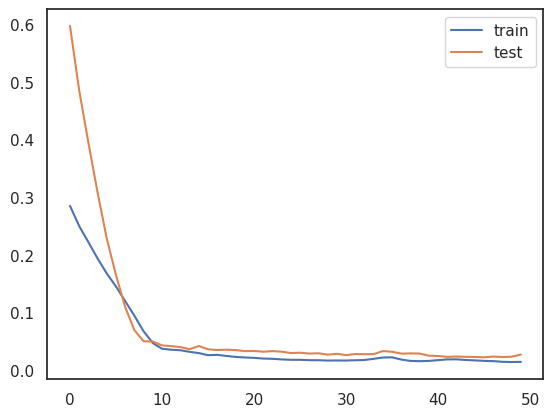

In [141]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [142]:
test_X

array([[[0.68681607, 0.5647824 , 0.47179418, ..., 0.16365936,
         0.70778957, 0.55782793],
        [0.70164859, 0.43706442, 0.10833899, ..., 0.10651768,
         0.71203863, 0.65645779],
        [0.72107553, 0.60423057, 0.38423814, ..., 0.1602305 ,
         0.71203321, 0.50342535]],

       [[0.70164859, 0.43706442, 0.10833899, ..., 0.10651768,
         0.71203863, 0.65645779],
        [0.72107553, 0.60423057, 0.38423814, ..., 0.1602305 ,
         0.71203321, 0.50342535],
        [0.69864923, 0.55581291, 0.36386843, ..., 0.18295428,
         0.70866103, 0.31190812]],

       [[0.72107553, 0.60423057, 0.38423814, ..., 0.1602305 ,
         0.71203321, 0.50342535],
        [0.69864923, 0.55581291, 0.36386843, ..., 0.18295428,
         0.70866103, 0.31190812],
        [0.70910989, 0.50387697, 0.45621978, ..., 0.11772755,
         0.6941926 , 0.13842434]],

       ...,

       [[0.86381003, 0.50686965, 0.07334765, ..., 0.22163523,
         0.95551213, 0.5720129 ],
        [0.91221311, 

In [143]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_hours * n_features,))

#yhat=yhat.reshape((yhat.shape[0]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, -6:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:, 0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, -6:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:, 0]
# calculate RMSE
mse = (mean_squared_error(inv_y, inv_yhat))
print('Test MSE: %.3f' % mse)
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Test MSE: 4651.386
Test RMSE: 68.201


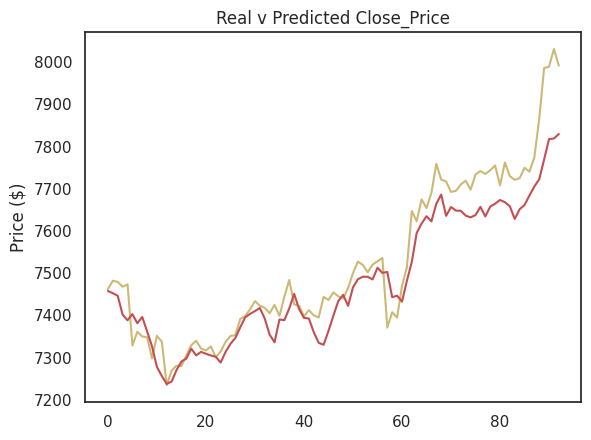

In [144]:
plt.title('Real v Predicted Close_Price')
plt.ylabel('Price ($)')
plt.plot(inv_y, label='Real', color='y')
plt.plot(inv_yhat, label='Predicted', color='r')

In [145]:
percent_errors = abs((inv_y - inv_yhat) * 100 / inv_y)

In [146]:
print('Average Percentage Error between the Actual close price of Bitcoins and the Predicted Price: ',
      percent_errors.mean(), '%')

Average Percentage Error between the Actual close price of Bitcoins and the Predicted Price:  0.6785602028094547 %
